In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

This code is submitted as part of project 2 for the subject COMP90037 (Security Analytics) at the University of  Melbourne .
     
    -------------------------------------------
    COMP90037 Security Analytics - Project 2 
    Machine learning based Threat detection

    Author : Mohammed Ahsan Kollathodi 
    Student id: 1048942.
    

### iForest classifier

The primary aim of the iForest classifier and is to obtain the records 
in contrast to finding the normal observations. The algorithm would 
split the records by selecting a feature by choosing a value between
the maximum and the minimum values with respect to the chosen 
feature. 

Most of the existing model-based approaches to anomaly detection 
would construct a profile of the normal instances; it then identifies 
the instances that do not confirm the normal profile as anomalies. 

The use of isolation would enable the proposed model or iForest 
to exploit the sub sampling to an extent that is not feasible in the 
existing methods creating an algorithm which has a linear time 
complexity with a low constant and low memory requirement. 

Experimental Design : Tuning only one paramter of the Sklearn iForest 
model which is "contamination", the contamination parameter would show the proportion of observations that can be considered as outliers. 

[provide reference to Liu et al. 2008] – Add more info. about iForest.(attachment:image.png)

### Principle Component Analysis(PCA)

The principal component analysis or the PCA is a dimensionality reduction method that is often used to reduce the dimensionality of large datasets by transforming a larger set of variables into a smaller one that contains most of the information of the larger set.



reference : https://builtin.com/data-science/step-step-explanation-principal-component-analysis

In [ ]:
#### Through this code my primary aim is to setup the iForest classifier and apply it to the dataset provided to create required model. 

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

### Train

In [3]:
df_train = pd.read_csv('train_data_with_PCA_A1.csv', sep=',')

In [4]:
df_train.head()

,PC1,PC2,PC3
0,2061.643438,6851.147699,-21125.993494
1,-818.914845,-17982.407564,5594.477966
2,-4025.163308,-9111.396463,-13531.652440
3,27019.553774,17440.296424,17247.812563
4,-22741.822775,-3447.456107,11580.003226


In [5]:
# SET THE CONTAMINATION PARAMETER AS 0.01
# The contamination parameter would show the proportion of observations that can be considered as outliers.

In [6]:
isln_frst = IsolationForest(contamination=0.01) 

In [7]:
isln_frst.fit(df_train)

IsolationForest(contamination=0.01)

### Test

In [8]:
df_test = pd.read_csv('test_data_with_PCA_A1.csv', sep=',')

In [9]:
df_test.shape

(348477, 3)

In [10]:
predict_test = isln_frst.predict(df_test)

In [11]:
# decision function. 
decision_function = isln_frst.decision_function(df_test)

In [12]:
df_test['Anomalies'] = predict_test
df_test['Score'] = decision_function

In [13]:
df_test['Anomalies'].value_counts() # -1 in the result would correspond to the number of anomalies.

 1    301698
-1     46779
Name: Anomalies, dtype: int64

In [14]:
df_test.loc[df_test['Anomalies'] == -1]

,PC1,PC2,PC3,Anomalies,Score
31,-122005.004884,81443.614044,48093.061384,-1,-0.047481
37,-105662.496760,74143.430454,71027.910628,-1,-0.046762
57,-102470.112250,65517.525869,63982.139251,-1,-0.037274
59,-121836.709240,93858.913660,27581.397721,-1,-0.031701
63,-122713.547072,80758.090345,50664.202258,-1,-0.059900
...,...,...,...,...,...
348426,-111000.153226,96525.942979,942.326615,-1,-0.022634
348427,-112016.379262,78799.306304,31822.755735,-1,-0.003624
348438,-109956.433723,94604.249308,1915.763421,-1,-0.017974
348451,-110840.398540,89279.931031,12380.087492,-1,-0.007454


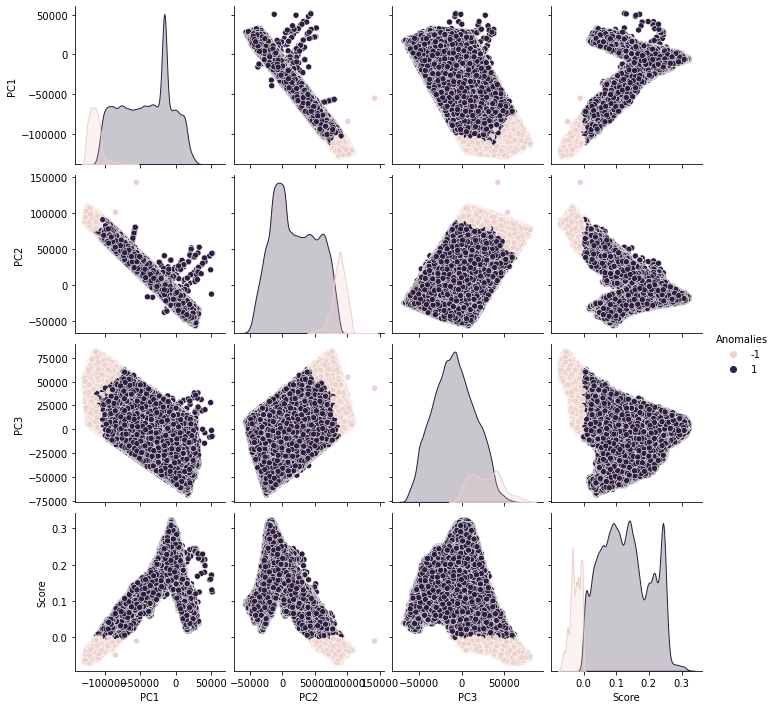

In [15]:
sns.pairplot(df_test, hue = 'Anomalies')

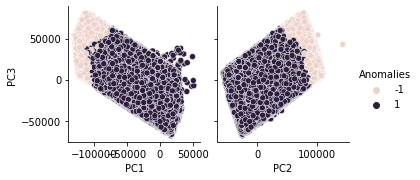

In [18]:
# sns pair plot. 
sns.pairplot(
    df_test, hue = 'Anomalies',
    x_vars=["PC1", "PC2"],
    y_vars=["PC3"],
)

In [20]:
anomalies_samples = df_test.loc[df_test['Anomalies'] == -1]

In [21]:
anomalies_samples.head(40)

,PC1,PC2,PC3,Anomalies,Score
31,-122005.004884,81443.614044,48093.061384,-1,-0.047481
37,-105662.496760,74143.430454,71027.910628,-1,-0.046762
57,-102470.112250,65517.525869,63982.139251,-1,-0.037274
59,-121836.709240,93858.913660,27581.397721,-1,-0.031701
63,-122713.547072,80758.090345,50664.202258,-1,-0.059900
68,-124564.635057,97989.022736,26494.278472,-1,-0.038911
74,-112099.395937,81897.121460,26959.287567,-1,-0.006913
78,-107389.807589,93755.090126,-1992.904155,-1,-0.017125
84,-110959.521604,71651.420542,52359.035299,-1,-0.039404
89,-110681.974854,71471.868334,52914.445798,-1,-0.040390


In [22]:
# Original test 
df_test_original = pd.read_csv('testdata_cleaned.csv', sep=',')


In [23]:
anomalies_feat_orig  = df_test_original[df_test_original.index.isin(anomalies_samples.index)]

In [24]:
anomalies_feat_orig = anomalies_feat_orig.merge(anomalies_samples[['Score']], left_index = True, right_index=True)

In [25]:
anomalies_feat_orig.head(40)

,timestamp,duration,protocol,src_ip,src_port,direction,dst_ip,dst_port,state,srctype_service,dsttype_service,num_total_packets,total_bytes,src_bytes,packets_in_Sec,bytes_total_in_Sec,Source_Bytes_Sec,Score
31,2021-08-15 18:24:13.687039,2930.674414,udp,97.182.106.187,6909,<->,150.35.87.232,13365,CON,0.0,0.0,8,985,741,0.002730,3.361001e-01,2.528428e-01,-0.047481
37,2021-08-15 18:24:13.756049,357.934266,tcp,97.129.189.70,57952,->,150.35.87.232,80,RPA_PA,0.0,0.0,55,4972,3209,0.153659,1.389082e+01,8.965333e+00,-0.046762
57,2021-08-15 18:24:14.289964,0.000330,tcp,93.186.41.11,80,<->,150.35.87.62,49463,FA_RA,0.0,0.0,3,177,59,9087.354467,5.361539e+05,1.787180e+05,-0.037274
59,2021-08-15 18:24:14.339105,3007.117100,udp,97.77.236.96,39055,<->,150.35.87.232,13360,CON,0.0,0.0,7,934,685,0.002328,3.105965e-01,2.277929e-01,-0.031701
63,2021-08-15 18:24:14.442852,0.000561,udp,97.201.114.85,9887,<->,150.35.87.232,13364,CON,0.0,0.0,1,132,72,1783.014411,2.353579e+05,1.283770e+05,-0.059900
68,2021-08-15 18:24:14.623381,2480.997955,udp,98.35.8.238,35763,<->,150.35.87.232,13364,CON,0.0,0.0,4,271,152,0.001612,1.092302e-01,6.126567e-02,-0.038911
74,2021-08-15 18:24:14.759886,3037.945994,udp,94.151.17.83,44873,<->,150.35.87.232,13361,CON,0.0,0.0,14,1703,1210,0.004608,5.605761e-01,3.982954e-01,-0.006913
78,2021-08-15 18:24:14.798288,1184.506954,udp,93.181.133.74,10012,<->,150.35.87.232,13361,CON,0.0,0.0,15,1701,1203,0.012663,1.436041e+00,1.015612e+00,-0.017125
84,2021-08-15 18:24:15.093170,8.648719,tcp,94.210.62.164,80,<->,150.35.87.62,2638,FA_FA,0.0,0.0,4,264,132,0.462496,3.052475e+01,1.526238e+01,-0.039404
89,2021-08-15 18:24:15.187153,8.521490,tcp,94.210.62.165,80,->,150.35.87.62,2740,FA_FA,0.0,0.0,4,263,132,0.469401,3.086315e+01,1.549025e+01,-0.040390


In [26]:
anomalies_feat_orig['src_ip'].nunique()

30338

In [27]:
import numpy as np

anomalies_feat_orig.loc[anomalies_feat_orig['packets_in_Sec'] != np.inf].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))


,duration,src_port,dst_port,srctype_service,dsttype_service,num_total_packets,total_bytes,src_bytes,packets_in_Sec,bytes_total_in_Sec,Source_Bytes_Sec,Score
count,46312,46312,46312,46310,42445,46312,46312,46312,45856,46312,46312,46312
mean,615.074,31948.9,14989.1,0.00960916,7.06797e-05,24.4441,15773.9,6189.13,1175.8,inf,inf,-0.025298
std,1123.75,20100.9,9724.35,0.157772,0.0145616,1031.8,913608,522828,3142.39,nan,nan,0.0162579
min,0,3,0,0,0,0,59,0,0,0.0463038,0,-0.0720876
25%,0.000757651,13415,13361,0,0,1,138,75,0.00741198,2.84124,1.58948,-0.0361047
50%,0.001855,30823,13363,0,0,2,363,146,561.381,148828,72245.4,-0.0241079
75%,606.338,50455.2,13365,0,0,4,684,430,1756.02,284773,106510,-0.0107615
max,3648.5,65537,65526,3,3,121899,1.2116e+08,1.01066e+08,202353,inf,inf,-1.57841e-05


In [28]:
# Save as CSV 
anomalies_feat_orig.to_csv('test_iForest_PCA_with_0.01_orig_feat_A1.csv', sep=',')